In [1]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

x = tf.Variable(3, name="x") 
y = tf.Variable(4, name="y") 
f=x*x*y+y+2

sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

Using TensorFlow backend.


42


In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import tensorflow as tf
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess:
    theta_value = theta.eval()

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

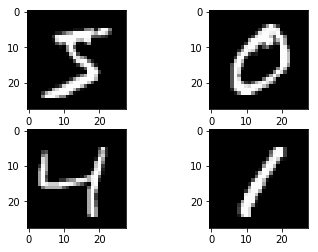

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2797 - acc: 0.9208 - val_loss: 0.1419 - val_acc: 0.9572
Epoch 2/10
 - 4s - loss: 0.1118 - acc: 0.9675 - val_loss: 0.0921 - val_acc: 0.9713
Epoch 3/10
 - 4s - loss: 0.0717 - acc: 0.9796 - val_loss: 0.0786 - val_acc: 0.9775
Epoch 4/10
 - 4s - loss: 0.0504 - acc: 0.9856 - val_loss: 0.0745 - val_acc: 0.9774
Epoch 5/10
 - 4s - loss: 0.0375 - acc: 0.9891 - val_loss: 0.0677 - val_acc: 0.9793
Epoch 6/10
 - 4s - loss: 0.0269 - acc: 0.9927 - val_loss: 0.0626 - val_acc: 0.9799
Epoch 7/10
 - 4s - loss: 0.0210 - acc: 0.9946 - val_loss: 0.0610 - val_acc: 0.9805
Epoch 8/10
 - 4s - loss: 0.0140 - acc: 0.9970 - val_loss: 0.0606 - val_acc: 0.9801
Epoch 9/10
 - 5s - loss: 0.0108 - acc: 0.9977 - val_loss: 0.0574 - val_acc: 0.9817
Epoch 10/10
 - 5s - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0589 - val_acc: 0.9814
Baseline Error: 1.86%


In [3]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import numpy as np

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Using TensorFlow backend.


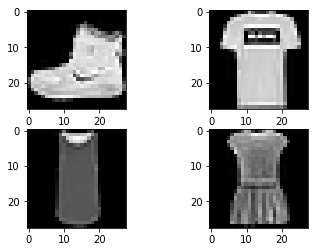

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.5035 - acc: 0.8233 - val_loss: 0.4273 - val_acc: 0.8484
Epoch 2/10
 - 4s - loss: 0.3770 - acc: 0.8679 - val_loss: 0.3996 - val_acc: 0.8591
Epoch 3/10
 - 4s - loss: 0.3358 - acc: 0.8780 - val_loss: 0.3713 - val_acc: 0.8679
Epoch 4/10
 - 5s - loss: 0.3070 - acc: 0.8892 - val_loss: 0.3454 - val_acc: 0.8753
Epoch 5/10
 - 5s - loss: 0.2892 - acc: 0.8950 - val_loss: 0.3613 - val_acc: 0.8646
Epoch 6/10
 - 4s - loss: 0.2715 - acc: 0.9009 - val_loss: 0.3318 - val_acc: 0.8787
Epoch 7/10
 - 5s - loss: 0.2614 - acc: 0.9027 - val_loss: 0.3192 - val_acc: 0.8835
Epoch 8/10
 - 5s - loss: 0.2442 - acc: 0.9095 - val_loss: 0.3125 - val_acc: 0.8907
Epoch 9/10
 - 4s - loss: 0.2350 - acc: 0.9129 - val_loss: 0.3197 - val_acc: 0.8845
Epoch 10/10
 - 5s - loss: 0.2222 - acc: 0.9179 - val_loss: 0.3040 - val_acc: 0.8906
Baseline Error: 10.94%


In [2]:
# Plot ad hoc mnist instances
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import numpy as np

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))